### How to Building Model with TensorFlow(Keras API)
There are the three types of keras sub api available for building model using tensorflow
1. Sequential API : We can easly implement the neural network architectures.
2. Functional API : It is mostly used to test architectures of the neural networks.
3. Sub-classing API : It is well adapted for the large scale data driven application creation.

### Step-0 Setup 

In [ ]:
# Setup and Import Core libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow & Keras
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### Step-2 Loading Dataset

In [3]:
# Downloading and Loading Data
# Create data directory
os.makedirs('data', exist_ok=True)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


### Step-3 Proprocessing Dataset

In [4]:
# Data Preprocessing
# 3.1 Reshape Image from 2D to 1D
# fully connected neural networks requires 1D input vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("Reshaped training data:", x_train.shape)
print("Reshaped test data:", x_test.shape)


Reshaped training data: (60000, 784)
Reshaped test data: (10000, 784)


In [5]:
# 3.2 Standardization with Zero Mean and Unit Variance
x_train = (
    x_train - np.mean(x_train, axis=1, keepdims=True)
) / np.std(x_train, axis=1, keepdims=True)

x_test = (
    x_test - np.mean(x_test, axis=1, keepdims=True)
) / np.std(x_test, axis=1, keepdims=True)


In [6]:
# 3.3 One-Hot Encoding Labels
num_labels = 10

y_onehot_train = np.zeros((y_train.shape[0], num_labels), dtype=np.float32)
y_onehot_train[np.arange(y_train.shape[0]), y_train] = 1.0

y_onehot_test = np.zeros((y_test.shape[0], num_labels), dtype=np.float32)
y_onehot_test[np.arange(y_test.shape[0]), y_test] = 1.0

print("One-hot label shape:", y_onehot_train.shape)


One-hot label shape: (60000, 10)


## Step-4 Sequential API : Building Neural Network Architecture

In [7]:
# 4 Building Neural Network
# 4.1 Sequential API
"""   
Architecture

Input: 784
Hidden Layer 1: 500 (ReLU)
Hidden Layer 2: 250 (ReLU)
Output: 10 (Softmax)
"""
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,260 (1.98 MB)

 Trainable params: 520,260 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 5.1 Compiling the sequential model
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)


In [9]:
# Training the model
batch_size = 100
num_epochs = 10

history = model.fit(
    x=x_train,
    y=y_onehot_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.2
)


Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8751 - loss: 0.4131 - val_accuracy: 0.9666 - val_loss: 0.1117
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9735 - loss: 0.0881 - val_accuracy: 0.9653 - val_loss: 0.1207
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9832 - loss: 0.0527 - val_accuracy: 0.9733 - val_loss: 0.0978
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9879 - loss: 0.0378 - val_accuracy: 0.9750 - val_loss: 0.1033
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9760 - val_loss: 0.1104
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9783 - val_loss: 0.1082
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9736 - val_loss: 0.1489
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9953 - loss: 0.0138 - val_accu

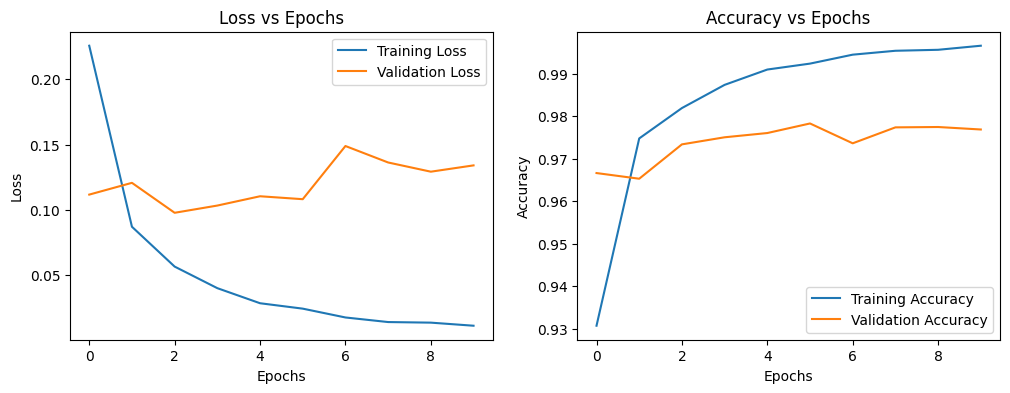

In [10]:
# Visualizing Training Performance
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [11]:
# Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(
    x=x_test,
    y=y_onehot_test,
    batch_size=batch_size
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9741 - loss: 0.1397
Test Loss: 0.11724402755498886
Test Accuracy: 0.9778000116348267


In [12]:
# Making prediction onto the unseen dataset
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_classes)
print("True labels:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


## Step-5 Functional API : Building Neural Network Architecture

In [13]:
# 4.2 Functional API
# Input layer
inputs = tf.keras.layers.Input(shape=(784,))

# Hidden layers
x = tf.keras.layers.Dense(500, activation='relu')(inputs)
x = tf.keras.layers.Dense(250, activation='relu')(x)

# Output layer
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# Define model
functional_model = tf.keras.models.Model(
    inputs=inputs,
    outputs=outputs
)

functional_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,260 (1.98 MB)

 Trainable params: 520,260 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compiling the functional model
functional_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


In [15]:
# training the functional model 
history_func = functional_model.fit(
    x_train,
    y_onehot_train,
    batch_size=100,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8708 - loss: 0.4125 - val_accuracy: 0.9668 - val_loss: 0.1086
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9721 - loss: 0.0923 - val_accuracy: 0.9669 - val_loss: 0.1151
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9825 - loss: 0.0550 - val_accuracy: 0.9757 - val_loss: 0.0935
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9873 - loss: 0.0383 - val_accuracy: 0.9757 - val_loss: 0.1018
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.9741 - val_loss: 0.1158
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9756 - val_loss: 0.1215
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9946 - loss: 0.0175 - val_accuracy: 0.9776 - val_loss: 0.1194
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9959 - loss: 0.0131 - val_acc

In [16]:
# evaluating functional model
test_loss, test_acc = functional_model.evaluate(
    x_test,
    y_onehot_test,
    batch_size=100
)

print("Functional API Test Accuracy:", test_acc)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.1368
Functional API Test Accuracy: 0.9807000160217285


In [17]:
# Making prediction onto the unseen dataset
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_classes)
print("True labels:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


## Step-6 Sub-Classing API : Building Neural Network Architecture

In [18]:
# 4.3 Sub-classing API 
# It provides maximum flexbility
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super().__init__()
        self.hidden1 = tf.keras.layers.Dense(500, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(250, activation='relu')
        self.output_layer = tf.keras.layers.Dense(
            num_classes, activation='softmax'
        )

    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.hidden2(x)
        return self.output_layer(x)
# instantiate the model 
subclass_model = MyModel(num_classes=10)

# Build model (required for summary)
subclass_model.build(input_shape=(None, 784))
subclass_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'my_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Instantiate the model
subclass_model = MyModel(num_classes=10)

# Build model (required for summary)
subclass_model.build(input_shape=(None, 784))
subclass_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'my_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "my_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# compile sub-class model
subclass_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


In [21]:
# train sub-class model
history_sub = subclass_model.fit(
    x_train,
    y_onehot_train,
    batch_size=100,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8698 - loss: 0.4323 - val_accuracy: 0.9682 - val_loss: 0.1053
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9709 - loss: 0.0873 - val_accuracy: 0.9714 - val_loss: 0.0949
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9717 - val_loss: 0.1087
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9879 - loss: 0.0393 - val_accuracy: 0.9712 - val_loss: 0.1203
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9910 - loss: 0.0286 - val_accuracy: 0.9770 - val_loss: 0.1138
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9931 - loss: 0.0197 - val_accuracy: 0.9781 - val_loss: 0.1113
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9783 - val_loss: 0.1348
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9954 - loss: 0.0145 - val_acc

In [22]:
# evaluate sub-class model
test_loss, test_acc = subclass_model.evaluate(
    x_test,
    y_onehot_test,
    batch_size=100
)

print("Subclass API Test Accuracy:", test_acc)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9742 - loss: 0.1709
Subclass API Test Accuracy: 0.9781000018119812


In [23]:
# Making prediction onto the unseen dataset
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted labels:", predicted_classes)
print("True labels:", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]
